In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix, precision_score, recall_score, roc_curve

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30
pd.set_option('use_inf_as_na', True)

# Visualizations
import plotly
import plotly.graph_objs as go
import plotly.offline as ply
import matplotlib.pyplot as plt

# We're going to use CART-like models
from sklearn import tree

sink = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

poly = preprocessing.PolynomialFeatures(degree=1,include_bias = False)
sink.head(5)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
y_train = sink["survived"]
X_train = sink.drop(columns=["name", "cabin", "ticket", "survived"])
X_test = test.drop(columns=["name", "cabin", "ticket"])
X_test = pd.get_dummies(data=X_test, columns=["sex", "embarked"])
X_train = pd.get_dummies(data=X_train, columns=["sex", "embarked"])
X_train = X_train.replace(np.nan, 0)
X_test = X_test.replace(np.nan, 0)

In [3]:
scaler = preprocessing.StandardScaler().fit(X_train)
#scaler_test = preprocessing.StandardScaler().fit(X_test)

In [4]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_train = poly.fit_transform(X_train)

scaler.fit(X_test)
X_test = scaler.transform(X_test)
X_test = poly.fit_transform(X_test)

In [5]:
reg = LogisticRegression(max_iter=2000, penalty="l2")
reg.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [6]:
y_train_predict = reg.predict(X_train)
y_train_prob = reg.predict_proba(X_train)
y_train_prob = y_train_prob[:, 1]

/Users/erik/everything/venvs/ml/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



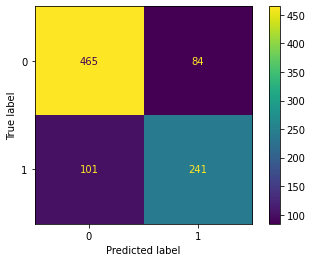

In [7]:
plot_confusion_matrix(reg, X_train, y_train)

In [8]:
precision_score(y_train, y_train_predict)

0.7415384615384616

In [9]:
recall_score(y_train, y_train_predict)

0.7046783625730995

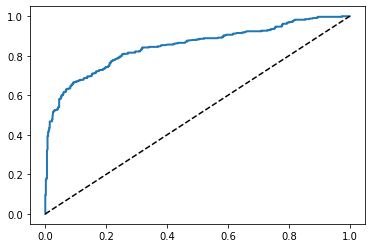

0.5725730782377733

In [10]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], "k--")
plt.show()
optimal_threshold

In [12]:
y_pred_probabilities = reg.predict_proba(X_test)
y_pred = (y_pred_probabilities >= optimal_threshold)[:, 1].astype(int)

In [13]:
prediction = pd.DataFrame({"Survived": y_pred, "PassengerId": range(892,  892 + y_pred.size)})
prediction.to_csv("titanic_logreg.csv", index=False)

In [14]:
prediction

,Survived,PassengerId
0,0,892
1,0,893
2,0,894
3,0,895
4,0,896
...,...,...
413,0,1305
414,1,1306
415,0,1307
416,0,1308
